In [1]:
import pandas as pd

In [2]:
surveys_df = pd.read_csv("data/surveys.csv")

In [3]:
surveys_df

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


## View dataframe objects

In [4]:
type(surveys_df)

pandas.core.frame.DataFrame

In [5]:
surveys_df.dtypes # returns a Series with the data type of each column.

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

In [6]:
surveys_df.index #index (row labels)

RangeIndex(start=0, stop=35549, step=1)

In [7]:
# Challenge - DataFrames

surveys_df.columns # column labels 

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

In [8]:
surveys_df.shape # a tuple representing the dimensionality

#type(surveys_df.shape) -> Tuple

(35549, 9)

In [9]:
surveys_df.tail() #Return the LAST n rows. default n=5

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0
35548,35549,12,31,2002,5,NaN,NaN,NaN,NaN


In [10]:
surveys_df.head(7) #Return the FIRST n rows. default n=5

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN


In [11]:
pd.unique(surveys_df['species_id'])

array(['NL', 'DM', 'PF', 'PE', 'DS', 'PP', 'SH', 'OT', 'DO', 'OX', 'SS',
       'OL', 'RM', nan, 'SA', 'PM', 'AH', 'DX', 'AB', 'CB', 'CM', 'CQ',
       'RF', 'PC', 'PG', 'PH', 'PU', 'CV', 'UR', 'UP', 'ZL', 'UL', 'CS',
       'SC', 'BA', 'SF', 'RO', 'AS', 'SO', 'PI', 'ST', 'CU', 'SU', 'RX',
       'PB', 'PL', 'PX', 'CT', 'US'], dtype=object)

In [58]:
# Challenge - Statistics

site_names = pd.unique(surveys_df['plot_id'])
print('unique sites:', len(site_names)) #include NaN
species_names = pd.unique(surveys_df['species_id'])
print('unique species:', len(species_names)) #include NaN


unique sites: 24
unique species: 49


 ## Dfference between len() and .nunique()
 
 DataFrame.nunique: exclude NaN -> default parameter dropna=True <br>
 Series.unique: include NaN -> default parameter dropna=False
 

In [13]:
#  watch the above "hindfoot_length" column

hindfoot = pd.unique(surveys_df.head(7)['hindfoot_length']) # include NaN
print(len(hindfoot)) # include NaN
print(len(surveys_df.head(7)['hindfoot_length'].unique())) 
print(surveys_df.head(7)['hindfoot_length'].nunique()) # exclude NaN
print(surveys_df.head(7)['hindfoot_length'].nunique(dropna=False))

7
7
6
7


In [14]:
surveys_df['weight'].describe() # calculate basic statistics

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

In [15]:
surveys_df['weight'].describe().min() #statistics extraction

4.0

## Pandas .groupby method

In [61]:
# Group data by sex
grouped_data = surveys_df.groupby('sex')

In [17]:
# Summary statistics for all numeric columns by sex
grouped_data.describe()

# Provide the mean for each numeric column by sex
grouped_data.mean()

,record_id,month,day,year,plot_id,hindfoot_length,weight
sex,,,,,,,
F,18036.412046,6.587253,15.880943,1990.644997,11.440854,28.836780,42.170555
M,17754.835601,6.396184,16.078799,1990.480401,11.098282,29.709578,42.995379


In [72]:
# Challenge - Summary Data

print(grouped_data.size())
surveys_df.groupby('sex')['plot_id'].describe()

sex
F    15690
M    17348
dtype: int64


,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
F,15690.0,11.440854,6.870684,1.0,5.0,12.0,17.0,24.0
M,17348.0,11.098282,6.728713,1.0,5.0,11.0,17.0,24.0


In [19]:
grouped_data2 = surveys_df.groupby(['plot_id', 'sex'])
grouped_data2.mean()

# Remark that the mean does NOT make sense for each variable

record_id     month        day         year  hindfoot_length  \
plot_id sex                                                                    
1       F    18390.384434  6.597877  15.338443  1990.933962        31.733911   
        M    17197.740639  6.121461  15.905936  1990.091324        34.302770   
2       F    17714.753608  6.426804  16.288660  1990.449485        30.161220   
        M    18085.458042  6.340035  15.440559  1990.756119        30.353760   
3       F    19888.783875  6.610302  15.993281  1992.013438        23.774044   
        M    20226.767857  6.277381  16.271429  1992.275000        23.833744   
4       F    17489.205275  6.447248  15.608945  1990.235092        33.249102   
        M    18493.841748  6.436893  16.303883  1991.000971        34.097959   
5       F    12280.793169  6.142315  15.722960  1986.485769        28.921844   
        M    12798.426621  6.194539  15.703072  1986.817406        29.694794   
6       F    19406.503392  6.640434  15.947083  1991.579376        26.981322   
        M    17849.574607  6.043194  15.856021  1990.556283        27.425591   
7       F    19069.668657  6.385075  15.313433  1991.441791        19.779553   
        M    19188.729642  6.719870  15.778502  1991.462541        20.536667   
8       F    18920.276190  6.644048  15.479762  1991.267857        32.187578   
        M    19452.109868  6.585961  15.427263  1991.686673        33.751059   
9       F    16217.497069  6.507620  15.309496  1989.303634        35.126092   
        M    18000.710159  6.369522  14.970120  1990.632470        34.175732   
10      F    16001.496454  5.588652  16.964539  1989.248227        18.641791   
        M    15708.704225  5.718310  16.739437  1989.007042        19.567164   
11      F    16994.962287  6.770073  15.954988  1989.836983        32.029299   
        M    16933.909621  6.379981  15.799806  1989.856171        32.078014   
12      F    17457.966981  6.509434  16.305660  1990.266981        30.975124   
        M    17592.327500  6.304167  16.367500  1990.400833        31.762489   
13      F    18033.100318  6.815287  15.847134  1990.619427        27.201014   
        M    16969.044700  6.485313  15.851852  1989.911877        27.893793   
14      F    17097.145275  6.519041  16.427362  1989.974612        32.973373   
        M    17891.948598  6.666355  16.336449  1990.587850        32.961802   
15      F    20602.449064  6.582121  15.787942  1992.523909        21.949891   
        M    18104.019560  6.193154  17.193154  1990.770171        21.803109   
16      F    19002.445946  6.369369  16.549550  1991.351351        23.144928   
        M    18434.714286  6.208791  16.402930  1990.926740        23.480916   
17      F    18234.322870  6.650224  15.892377  1990.785874        30.918536   
        M    18857.651472  6.569801  16.183286  1991.331434        32.227634   
18      F    17940.875497  6.698013  15.960265  1990.536424        26.690341   
        M    15106.718850  6.610224  16.797125  1988.551118        27.703072   
19      F    21848.216475  6.701149  15.226054  1993.417625        21.257937   
        M    19470.779690  6.533563  16.647160  1991.740103        21.071685   
20      F    17510.769231  6.743077  16.026154  1990.253846        27.069193   
        M    16076.192496  6.489396  16.375204  1989.243067        27.908451   
21      F    22452.636661  6.860884  16.307692  1993.878887        22.366554   
        M    20120.399113  6.671840  16.203991  1992.199557        21.736721   
22      F    18499.695976  6.651267  15.521610  1990.973174        34.108320   
        M    18015.365527  6.381872  16.682021  1990.650817        33.359746   
23      F    15863.193939  6.860606  16.036364  1989.024242        20.051948   
        M    17091.338164  6.391304  16.077295  1989.961353        19.850000   
24      F    13702.224280  6.596708  16.393004  1987.485597        26.993377   
        M    15208.136082  6.360825  16.971134  1988.641237        25.786996   

               

In [63]:
surveys_df.groupby(['plot_id', 'sex']).agg({"year": 'min',
                                           "hindfoot_length": 'median',
                                           "weight": 'mean'})

year  hindfoot_length     weight
plot_id sex                                  
1       F    1977             34.0  46.311138
        M    1977             36.0  55.950560
2       F    1977             33.0  52.561845
        M    1977             33.0  51.391382
3       F    1977             22.0  31.215349
        M    1977             22.0  34.163241
4       F    1977             36.0  46.818824
        M    1977             36.0  48.888119
5       F    1977             34.0  40.974806
        M    1977             34.0  40.708551
6       F    1977             25.0  36.352288
        M    1977             25.0  36.867388
7       F    1977             20.0  20.006135
        M    1977             20.0  21.194719
8       F    1977             35.0  45.623011
        M    1977             36.0  49.641372
9       F    1977             36.0  53.618469
        M    1977             36.0  49.519309
10      F    1977             17.0  17.094203
        M    1977             17.0  19.971223
11      F    1977             35.0  43.515075
        M    1977             36.0  43.366197
12      F    1977             35.0  49.831731
        M    1977             35.0  48.909710
13      F    1977             25.0  40.524590
        M    1977             26.0  40.097754
14      F    1977             35.0  47.355491
        M    1977             36.0  45.159378
15      F    1977             21.0  26.670236
        M    1977             21.0  27.523691
16      F    1977             21.0  25.810427
        M    1977             21.0  23.811321
17      F    1977             34.0  48.176201
        M    1977             35.0  47.558853
18      F    1977             25.0  36.963514
        M    1977             26.0  43.546952
19      F    1977             21.0  21.978599
        M    1977             21.0  20.306878
20      F    1977             25.0  52.624406
        M    1977             26.0  44.197279
21      F    1977             24.0  25.974832
        M    1977             21.0  22.772622
22      F    1977             36.0  53.647059
        M    1977             36.0  54.572531
23      F    1977             18.0  20.564417
        M    1977             18.0  18.941463
24      F    1979             22.0  47.914405
        M    1979             21.0  39.321503

In [20]:
print('site:',surveys_df.groupby('plot_id')['weight'].describe())

site:           count       mean        std  min   25%   50%   75%    max
plot_id                                                            
1        1903.0  51.822911  38.176670  4.0  30.0  44.0  53.0  231.0
2        2074.0  52.251688  46.503602  5.0  24.0  41.0  50.0  278.0
3        1710.0  32.654386  35.641630  4.0  14.0  23.0  36.0  250.0
4        1866.0  47.928189  32.886598  4.0  30.0  43.0  50.0  200.0
5        1092.0  40.947802  34.086616  5.0  21.0  37.0  48.0  248.0
6        1463.0  36.738893  30.648310  5.0  18.0  30.0  45.0  243.0
7         638.0  20.663009  21.315325  4.0  11.0  17.0  23.0  235.0
8        1781.0  47.758001  33.192194  5.0  26.0  44.0  51.0  178.0
9        1811.0  51.432358  33.724726  6.0  36.0  45.0  50.0  275.0
10        279.0  18.541219  20.290806  4.0  10.0  12.0  21.0  237.0
11       1793.0  43.451757  28.975514  5.0  26.0  42.0  48.0  212.0
12       2219.0  49.496169  41.630035  6.0  26.0  42.0  50.0  280.0
13       1371.0  40.445660  34.042767  5.0

In [21]:
# Count the number of samples by species
species_counts = surveys_df.groupby('species_id')['record_id'].count()
# surveys_df.groupby('species_id').count()["record_id"] # same function
print(species_counts)

species_id
AB      303
AH      437
AS        2
BA       46
CB       50
CM       13
CQ       16
CS        1
CT        1
CU        1
CV        1
DM    10596
DO     3027
DS     2504
DX       40
NL     1252
OL     1006
OT     2249
OX       12
PB     2891
PC       39
PE     1299
PF     1597
PG        8
PH       32
PI        9
PL       36
PM      899
PP     3123
PU        5
PX        6
RF       75
RM     2609
RO        8
RX        2
SA       75
SC        1
SF       43
SH      147
SO       43
SS      248
ST        1
SU        5
UL        4
UP        8
UR       10
US        4
ZL        2
Name: record_id, dtype: int64


In [22]:
surveys_df.groupby('species_id')['record_id'].count()['DO']

3027

In [23]:
# Multiply all weight values by 2
surveys_df['weight']*2

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
35544      NaN
35545      NaN
35546     28.0
35547    102.0
35548      NaN
Name: weight, Length: 35549, dtype: float64

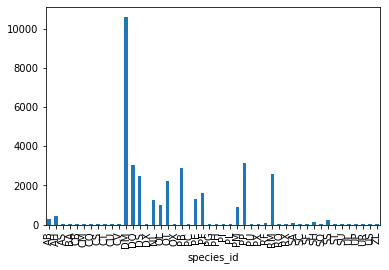

In [24]:
# Make sure figures appear inline in Ipython Notebook
%matplotlib inline
# Create a quick bar chart
species_counts.plot(kind='bar');

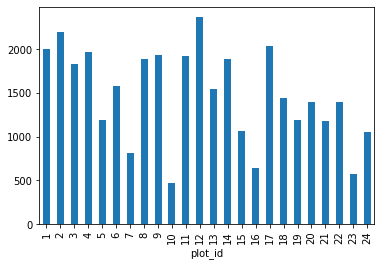

In [25]:
total_count = surveys_df.groupby('plot_id')['record_id'].nunique()
# Let's plot that too
total_count.plot(kind='bar');

plot_id
1     51.822911
2     52.251688
3     32.654386
4     47.928189
5     40.947802
6     36.738893
7     20.663009
8     47.758001
9     51.432358
10    18.541219
11    43.451757
12    49.496169
13    40.445660
14    46.277199
15    27.042578
16    24.585417
17    47.889593
18    40.005922
19    21.105166
20    48.665303
21    24.627794
22    54.146379
23    19.634146
24    43.679167
Name: weight, dtype: float64


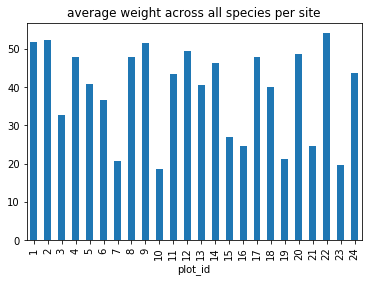

In [66]:
# Challenge - Plots

# Create a plot of average weight across all species per site.
average_weight = surveys_df.groupby('plot_id')['weight'].mean()
print(average_weight)
average_weight.plot(kind='bar', title="average weight across all species per site")

sex
F    15690
M    17348
Name: record_id, dtype: int64


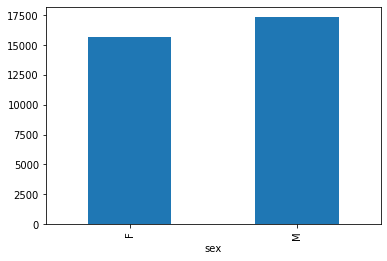

In [68]:
# Create a plot of total males versus total females for the entire dataset.
average_weight = surveys_df.groupby('sex')['record_id'].count()
print(average_weight)
average_weight.plot(kind='bar')

## Summary Plotting Challenge

In [39]:
surveys_df.groupby('sex')['plot_id'].count()

sex
F    15690
M    17348
Name: plot_id, dtype: int64

In [41]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']), 'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
pd.DataFrame(d)

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


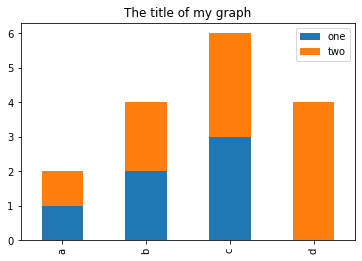

In [44]:
# Plot stacked data so columns 'one' and 'two' are stacked
my_df = pd.DataFrame(d)
my_df.plot(kind='bar', stacked=True, title="The title of my graph")

In [51]:
by_site_sex  = surveys_df.groupby(['plot_id', 'sex'])
site_sex_count = by_site_sex['weight'].sum()
site_sex_count # stack version

plot_id  sex
1        F      38253.0
         M      59979.0
2        F      50144.0
         M      57250.0
3        F      27251.0
         M      28253.0
4        F      39796.0
         M      49377.0
5        F      21143.0
         M      23326.0
6        F      26210.0
         M      27245.0
7        F       6522.0
         M       6422.0
8        F      37274.0
         M      47755.0
9        F      44128.0
         M      48727.0
10       F       2359.0
         M       2776.0
11       F      34638.0
         M      43106.0
12       F      51825.0
         M      57420.0
13       F      24720.0
         M      30354.0
14       F      32770.0
         M      46469.0
15       F      12455.0
         M      11037.0
16       F       5446.0
         M       6310.0
17       F      42106.0
         M      48082.0
18       F      27353.0
         M      26433.0
19       F      11297.0
         M      11514.0
20       F      33206.0
         M      25988.0
21       F      15481.0
   

In [56]:
spc = site_sex_count.unstack() # unstack version
spc

sex,F,M
plot_id,,
1,38253.0,59979.0
2,50144.0,57250.0
3,27251.0,28253.0
4,39796.0,49377.0
5,21143.0,23326.0
6,26210.0,27245.0
7,6522.0,6422.0
8,37274.0,47755.0
9,44128.0,48727.0


Text(0.5, 0, 'Plot')

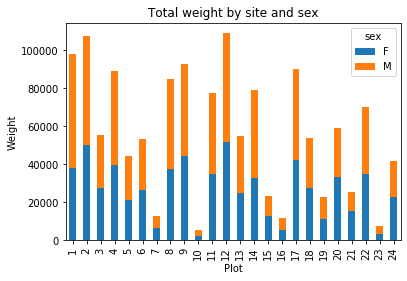

In [55]:
s_plot = spc.plot(kind='bar', stacked=True, title="Total weight by site and sex")
s_plot.set_ylabel("Weight")
s_plot.set_xlabel("Plot")